# Downloading and Prepping Data <a id="2"></a>

Import primary modules.

In [1]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

Download the dataset and read it into a *pandas* dataframe.

In [3]:
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2
                      )

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


Clean up data. We will make some modifications to the original dataset to make it easier to create our visualizations. Refer to *Introduction to Matplotlib and Line Plots* and *Area Plots, Histograms, and Bar Plots* for a detailed description of this preprocessing.

In [4]:
# clean up the dataset to remove unnecessary columns (eg. REG) 
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

# let's rename the columns so that they make sense
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# for sake of consistency, let's also make all column labels of type string
df_can.columns = list(map(str, df_can.columns))

# set the country name as index - useful for quickly looking up countries using .loc method
df_can.set_index('Country', inplace=True)

# add total column
df_can['Total'] = df_can.sum(axis=1)

# years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(1980, 2014)))
print('data dimensions:', df_can.shape)

data dimensions: (195, 38)


In [5]:
df_can

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,Asia,South-Eastern Asia,Developing regions,1191,1829,2162,3404,7583,5907,2741,...,1852,3153,2574,1784,2171,1942,1723,1731,2112,97146
Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
Yemen,Asia,Western Asia,Developing regions,1,2,1,6,0,18,7,...,161,140,122,133,128,211,160,174,217,2985


In [30]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.3.2


**Question 1:** Using a pie chart, explore the proportion (percentage) of new immigrants grouped by continents in the year 2013.

**Note**: You might need to play with the explore values in order to fix any overlapping slice values.

In [6]:
### type your answer here
# group countries by continents and apply sum() function 
df_continents = df_can.groupby('Continent', axis=0).sum()

# note: the output of the groupby method is a `groupby' object. 
# we can not use it further until we apply a function (eg .sum())
print(type(df_can.groupby('Continent', axis=0)))

df_continents.head()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


In [32]:
df_continents2013 = df_continents['2013']
df_continents2013

Continent
Africa                              38543
Asia                               155075
Europe                              28691
Latin America and the Caribbean     24950
Northern America                     8503
Oceania                              1775
Name: 2013, dtype: int64

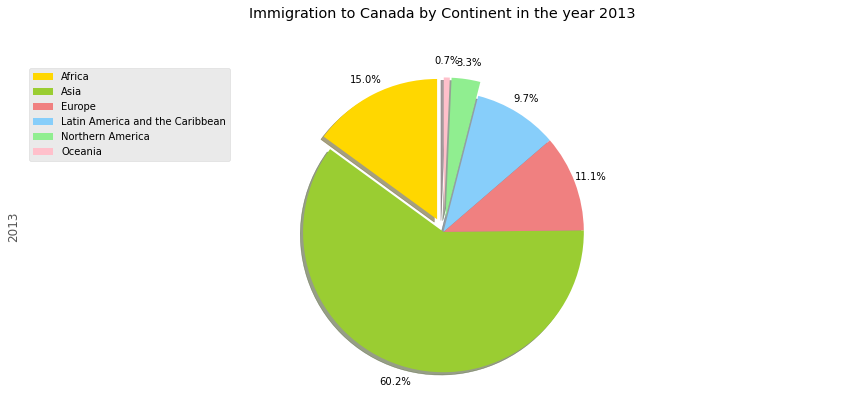

In [33]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

df_continents['2013'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent in the year 2013', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_continents.index, loc='upper left') 

plt.show()

**Question 2:** Compare the distribution of the number of immigrants from Pakistan and Afghanistan from 1980 to 2013.

Step 1: Get the dataset for Pakistan and Afghanistan and call the dataframe **df_PA**.

In [39]:
### type your answer here
# to get a dataframe, place extra square brackets around 'Japan'.
df_PA = df_can.loc[['Pakistan','Afghanistan'], years].transpose()

df_PA

Country,Pakistan,Afghanistan
1980,978,16
1981,972,39
1982,1201,39
1983,900,47
1984,668,71
1985,514,340
1986,691,496
1987,1072,741
1988,1334,828
1989,2261,1076


In [41]:
df_P = df_can.loc[['Pakistan'], years].transpose()
df_P.sort_values(['Pakistan'], ascending=False, axis=0, inplace=True)
df_P

Country,Pakistan
2001,16708
2000,15400
2002,15110
2005,14314
2004,13399
2003,13205
2006,13127
1997,13073
2013,12603
2012,11227


In [57]:
df_A = df_can.loc[['Afghanistan'], years].transpose()
df_A.sort_values(['Afghanistan'], ascending=False, axis=0, inplace=True)
df_A

Country,Afghanistan
2001,4067
2002,3697
2003,3479
2005,3436
2000,3326
2006,3009
2004,2978
2007,2652
2012,2635
1997,2555


Step 2: Plot data.

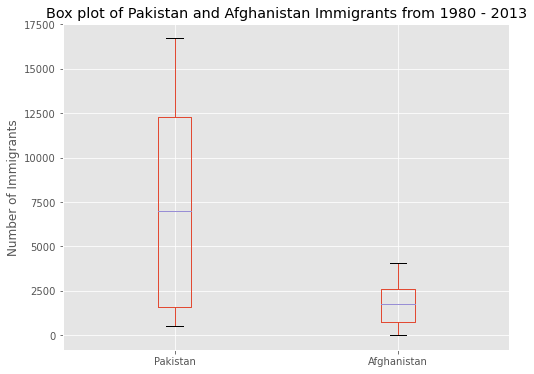

In [35]:
### type your answer here
df_PA.plot(kind='box', figsize=(8, 6))

plt.title('Box plot of Pakistan and Afghanistan Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')

plt.show()

**Question 3**: Create a scatter plot of the total immigration from Denmark, Norway, and Sweden to Canada from 1980 to 2013?

Step 1: Get the data:
   1. Create a dataframe the consists of the numbers associated with Denmark, Norway, and Sweden only. Name it **df_countries**.
   2. Sum the immigration numbers across all three countries for each year and turn the result into a dataframe. Name this new dataframe **df_total**.
   3. Reset the index in place.
   4. Rename the columns to **year** and **total**.
   5. Display the resulting dataframe.

In [60]:
### my first answer
## Create a dataframe the consists of the numbers associated with Denmark, Norway, and Sweden only. Name it df_countries.
countries = ['Denmark','Norway','Sweden']
df_sem = df_can['Total']
df_countries_1 = df_sem.loc[countries]
df_countries_1

Country
Denmark    3901
Norway     2327
Sweden     5866
Name: Total, dtype: int64

In [66]:
### my second answer
## Create a dataframe the consists of the numbers associated with Denmark, Norway, and Sweden only. Name it df_countries.
countries = ['Denmark','Norway','Sweden']
df_countries_2 = df_can.loc[countries]
df_countries_2.drop(['Continent','Region','DevName'], axis=1, inplace=True)
df_countries_2

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,272,293,299,106,93,73,93,109,129,129,...,62,101,97,108,81,92,93,94,81,3901
Norway,116,77,106,51,31,54,56,80,73,76,...,57,53,73,66,75,46,49,53,59,2327
Sweden,281,308,222,176,128,158,187,198,171,182,...,205,139,193,165,167,159,134,140,140,5866


In [69]:
## Sum the immigration numbers across all three countries for each year and turn the result into a dataframe. Name this new dataframe df_total.
df_total = pd.DataFrame(df_countries_2[years].sum(axis=0))

# change the years to type int (useful for regression later on)
df_total.index = map(int, df_total.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_total.reset_index(inplace = True)

# rename columns
df_total.columns = ['year', 'total']

# view the final dataframe
df_total

,year,total
0,1980,669
1,1981,678
2,1982,627
3,1983,333
4,1984,252
5,1985,285
6,1986,336
7,1987,387
8,1988,373
9,1989,387


Step 2: Generate the scatter plot by plotting the total versus year in **df_total**.

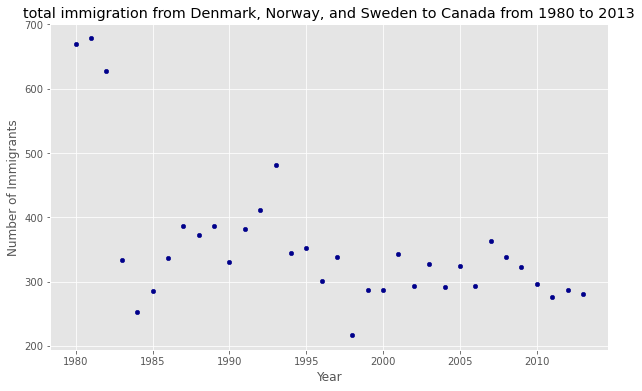

In [70]:
### type your answer here
df_total.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('total immigration from Denmark, Norway, and Sweden to Canada from 1980 to 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

**Question 4**: Previously in this lab, we created box plots to compare immigration from China and India to Canada. Create bubble plots of immigration from China and India to visualize any differences with time from 1980 to 2013. You can use **df_can_t** that we defined and used in the previous example.

Step 1: Normalize the data pertaining to China and India.

In [73]:
df_can_t = df_can[years].transpose() # transposed dataframe

# cast the Years (the index) to type int
df_can_t.index = map(int, df_can_t.index)

# let's label the index. This will automatically be the column name when we reset the index
df_can_t.index.name = 'Year'

# reset index to bring the Year in as a column
df_can_t.reset_index(inplace=True)

# view the changes
df_can_t.head()

Country,Year,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe
0,1980,16,1,80,0,0,1,0,368,0,...,9378,128,0,0,103,1191,0,1,11,72
1,1981,39,0,67,1,0,3,0,426,0,...,10030,132,0,0,117,1829,0,2,17,114
2,1982,39,0,71,0,0,6,0,626,0,...,9074,146,0,0,174,2162,0,1,11,102
3,1983,47,0,69,0,0,6,0,241,0,...,7100,105,0,0,124,3404,0,6,7,44
4,1984,71,0,63,0,0,4,42,237,0,...,6661,90,0,0,142,7583,0,0,16,32


In [79]:
df_CI = df_can.loc[['China','India'], years].transpose()
df_CI

Country,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704
1985,1816,4211
1986,1960,7150
1987,2643,10189
1988,2758,11522
1989,4323,10343


In [77]:
# normalize China data
norm_china = (df_can_t['China'] - df_can_t['China'].min()) / (df_can_t['China'].max() - df_can_t['China'].min())

# normalize india data
norm_india = (df_can_t['India'] - df_can_t['India'].min()) / (df_can_t['India'].max() - df_can_t['India'].min())

Step 2: Generate the bubble plots.

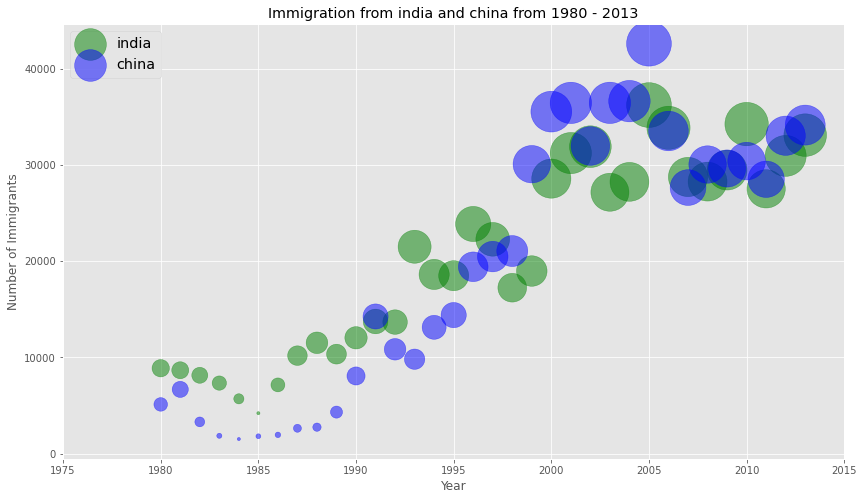

In [78]:
### type your answer here
# India
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='India',
                    figsize=(14, 8),
                    alpha=0.5,                  # transparency
                    color='green',
#                     s=norm_india * 2000 + 10,  # pass in weights 
                    s=norm_india * 2000 + 10, 
                    xlim=(1975, 2015)
                   )

# China
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='China',
                    alpha=0.5,
                    color="blue",
#                     s=norm_china * 2000 + 10,
                    s=norm_china * 2000 + 10,
                    ax = ax0
                   )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from india and china from 1980 - 2013')
ax0.legend(['india', 'china'], loc='upper left', fontsize='x-large')

# Thank you for completing this lab!

<hr>

Copyright &copy; 2019 [Cognitive Class](https://cognitiveclass.ai/?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).